## **TA Group Assignment - Group 1**

#### **Importing Packages**

In [357]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

#### **Import Dataset**

In [358]:
news_df = pd.read_csv("/content/news_social_2010_2023_.csv")
news_df.head()

,Unnamed: 0,Date,Close,News1,News2,News3,News4,News5,News6,News7,...,News21,News22,News23,News24,News25,News26,News27,News28,News29,News30
0,0,2010-01-04,4.6225,b'New airport scanners break child porn laws',b'Indian eye clinic founded by a single doc ha...,b'The president of Iceland refuses to sign a l...,"b'87% are illiterate, 1 in 3 experience physic...","b""Russia follows the EU in rejecting US poultr...",b'Teenager who killed his girlfriend by dousin...,b'Sweden allows wolf hunting after 45 year bec...,...,"b'""Russia has completed a new oil pipeline and...",b'Magazine Report Angers Politicians: Did the ...,"b""Gulf countries face water shortages. The reg...",b'Bolivia refuses to be U.S. slave: VP\n',b'Even Al Jazeera Sees It Coming',NaN,NaN,NaN,NaN,NaN
1,1,2010-01-05,4.6900,b'These images depict the untouched stomach co...,b'Slovakian authorities plant explosives on un...,"b""Ady Gil/Sea Shepherd 'cut in half' by Japane...",b'Fourteen suspected terrorists died Tuesday n...,"b""Reddit if a bomb had exploded on this flight...","b""An investigation by BBC's Newsnight has cast...","b""'Stealth' boat's bow sliced off in whaling c...",...,"b'South African President Zuma marries again ""...","b""Bad blood: The Japanese finance minister's d...",b'Kazakhstan now the biggest exporter of urani...,"b'One killed, 4 wounded in Israeli airstrike o...","b'The WHO\'s ""false pandemic"" flu campaign is ...",NaN,NaN,NaN,NaN,NaN
2,2,2010-01-06,4.7200,b'Three Americans go to Uganda and teach thous...,"b'Soviet General, 1986: ""After seven years in ...","b""Very quietly, China has become the world's s...","b""Investor who made huge fortune off predictin...","b'2,000 Egyptian riot policemen attacked and i...",b'UK government plans to implement loophole to...,"b'France wants tax on Google. ""We are not goin...",...,b'1970s-style rationing as UK National Grid cu...,b'Sudan on the brink of another civil war',b'Palestinian Christian groups are boycotting ...,b'Attack on Coptic Christians in Egypt Leaves ...,b'The conspiracy theory presented in a documen...,NaN,NaN,NaN,NaN,NaN
3,3,2010-01-07,4.6275,b'23-year-old British woman on holiday in Duba...,b'Portugals parliament approves same-sex marri...,"b""I think you're trying to seduce me Mrs. Robi...","b'No taxes, no customs duties, no government p...",b'French man earns bravery medal for diving in...,b'Costa Rica is one of the very few countries ...,b'Norway Time Hole Leak Plunges Northern Hemis...,...,b'Northern Irish fundamentalist Christian poli...,"b""It's Cold in England. How different is 2010 ...",b'China hit with $2.2 billion software piracy ...,"b""BBC News - 'Not guilty' plea in Detroit plan...",b'Chart showing deaths of Israelis and Palesti...,NaN,NaN,NaN,NaN,NaN
4,4,2010-01-08,4.6375,b'Top Imams affiliated with the Islamic Suprem...,b'Human sacrifices increase in Uganda; blood a...,b'An Indian man is in a serious condition in h...,"b""Muslims and Christians set fire to each othe...",b'Putin warns Russia is prepared to go on the ...,"b""A beauty pageant winner from Canada's east c...","b""Iran's hardline president has ordered the fo...",...,"b""Yesterday's news - Ady Gil collision from th...",b'Two more arrested in suspected New York bomb...,"b""China Is Now The World's Biggest New Car Mar...","b""Iran reformist Mehdi Karroubi's car shot at""","b""Greeces public debt: Can't afford to keep pe...",NaN,NaN,NaN,NaN,NaN


In [359]:
#Count the number of rows
num_rows=len(news_df)
print('number of rows:',num_rows)

number of rows: 3165


In [360]:
#check for null values in news_df
null_values = news_df.isnull().sum()
print(null_values)

Unnamed: 0       0
Date             0
Close           52
News1          516
News2          518
News3          522
News4          524
News5          524
News6          525
News7          526
News8          528
News9          530
News10         531
News11         533
News12         535
News13         539
News14         541
News15         543
News16         545
News17         547
News18         550
News19         559
News20         562
News21         567
News22         570
News23         572
News24         578
News25         584
News26        1151
News27        1155
News28        1161
News29        1169
News30        1174
dtype: int64


In the news_df, it was identified 403 null values in the "Close" column.We filled the null values in the "Close" column by averaging the previous and next day's closing prices, ensuring continuity in the data for accurate analysis. This approach maintains data integrity, preventing gaps that could skew any subsequent financial analyses.

In [361]:
# Fill the null values in the 'Close' column
for idx, row in news_df.iterrows():
    if pd.isnull(row['Close']):
        prev_close = news_df.loc[idx-1, 'Close'] if idx > 0 else None
        next_close = news_df.loc[idx+1, 'Close'] if idx < len(news_df)-1 else None

        if pd.notnull(prev_close) and pd.notnull(next_close):
            news_df.at[idx, 'Close'] = (prev_close + next_close) / 2
        elif pd.notnull(prev_close):
            news_df.at[idx, 'Close'] = prev_close
        elif pd.notnull(next_close):
            news_df.at[idx, 'Close'] = next_close

# Check whether 'Close' column has null values after filling them
print(news_df['Close'].isnull().sum())

0


In the original dataset it was given 30 separate news columns for a row. However, having separate 30 columns becomes difficult for the subsequent analysis. Therefore the dataframe was adjusted  by combining separate news columns into a single cell under "News_Text" column allows for easier analysis.

In [362]:
# Identify the columns to keep
columns_to_keep = ['Date', 'Close']

# Combine the separate news columns into one, with news items separated by commas
news_columns = news_df.columns[3:]
news_df['News_Text'] = news_df[news_columns].apply(lambda row: ', '.join(row.dropna().astype(str)), axis=1)

# Replace empty strings in 'News_Text' with NaN
news_df['News_Text'].replace('', np.nan, inplace=True)

# Select the columns to keep along with the new News_Text column
melted_df = news_df[columns_to_keep + ['News_Text']]

# Convert the 'Date' column to datetime format
melted_df['Date'] = pd.to_datetime(melted_df['Date'])

# Filter out rows with dates before 2010
melted_df = melted_df[melted_df['Date'].dt.year >= 2010]

# Sort by Date and reset index
melted_df = melted_df.sort_values(by='Date').reset_index(drop=True)

# Show the adjusted DataFrame
print(melted_df.head(50))

# Verify that empty values are treated as NaN
print(melted_df[melted_df['News_Text'].isnull()])


         Date   Close                                          News_Text
0  2010-01-04  4.6225  b'New airport scanners break child porn laws',...
1  2010-01-05  4.6900  b'These images depict the untouched stomach co...
2  2010-01-06  4.7200  b'Three Americans go to Uganda and teach thous...
3  2010-01-07  4.6275  b'23-year-old British woman on holiday in Duba...
4  2010-01-08  4.6375  b'Top Imams affiliated with the Islamic Suprem...
5  2010-01-11  4.5725  b'Why would a former Guantanamo Bay prison gua...
6  2010-01-12  4.4175  b'Dear World, The Chinese government stole int...
7  2010-01-13  4.4775  b'Please go to www.redcross.org and donate at ...
8  2010-01-14  4.4075  b'"It never ceases to amaze me that in times o...
9  2010-01-15  4.2775  b"France Calls for Cancellation of Haiti's Deb...
10 2010-01-19  4.3575  b'Haiti Struck By Major Earthquake for 2nd Tim...
11 2010-01-20  4.3400  b"Hamas accepts Israel's right to exist", b'Ou...
12 2010-01-21  4.2625  b'Im proud: the Dutch collec

<ipython-input-362-f8c35101c9b6>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  melted_df['Date'] = pd.to_datetime(melted_df['Date'])


In [363]:
#check null values in the melted dataframe
null_values = melted_df.isnull().sum()
print(null_values)

Date           0
Close          0
News_Text    516
dtype: int64


It was found that there are 27,430 null values in the "News_Text" column, which contains textual data, in the melted DataFrame. Since there is no meaningful way to fill the null values for textual data, it was decided to drop those rows with null values in the "News_Text" column.

In [364]:
# Drop rows where News_Text has null values
melted_df = melted_df.dropna(subset=['News_Text'])

In [365]:
null_values = melted_df.isnull().sum()
print(null_values)

Date         0
Close        0
News_Text    0
dtype: int64


In [366]:
#get the adjusted dataframe
melted_df.head(50)

,Date,Close,News_Text
0,2010-01-04,4.6225,"b'New airport scanners break child porn laws',..."
1,2010-01-05,4.6900,b'These images depict the untouched stomach co...
2,2010-01-06,4.7200,b'Three Americans go to Uganda and teach thous...
3,2010-01-07,4.6275,b'23-year-old British woman on holiday in Duba...
4,2010-01-08,4.6375,b'Top Imams affiliated with the Islamic Suprem...
5,2010-01-11,4.5725,b'Why would a former Guantanamo Bay prison gua...
6,2010-01-12,4.4175,"b'Dear World, The Chinese government stole int..."
7,2010-01-13,4.4775,b'Please go to www.redcross.org and donate at ...
8,2010-01-14,4.4075,"b'""It never ceases to amaze me that in times o..."
9,2010-01-15,4.2775,"b""France Calls for Cancellation of Haiti's Deb..."


## **Data Exploration**

In [367]:
# Shape of the dataset
print("Shape of the dataset:", melted_df.shape)

Shape of the dataset: (2649, 3)


In [368]:
# get the columns of the dataset
print("Columns of the dataset:")
print(melted_df.columns)

Columns of the dataset:
Index(['Date', 'Close', 'News_Text'], dtype='object')


In [369]:
#Description of the dataset
melted_df.describe(include='all')


,Date,Close,News_Text
count,2649,2649.000000,2649
unique,NaN,NaN,2649
top,NaN,NaN,"b'New airport scanners break child porn laws',..."
freq,NaN,NaN,1
mean,2015-04-21 02:59:55.922989824,21.905037,NaN
min,2010-01-04 00:00:00,2.220000,NaN
25%,2012-08-17 00:00:00,3.747500,NaN
50%,2015-04-10 00:00:00,5.485000,NaN
75%,2017-11-28 00:00:00,39.327499,NaN
max,2022-06-28 00:00:00,190.745002,NaN


In [370]:
#Examine the data types
melted_df.dtypes

Date         datetime64[ns]
Close               float64
News_Text            object
dtype: object

In [371]:
#Check for null values
melted_df.isnull().sum()

Date         0
Close        0
News_Text    0
dtype: int64

In [372]:
# Look for duplicates in the dataset
duplicates = melted_df.duplicated().any()

if duplicates:
    print("There are duplicates in the dataset.")
else:
    print("There are no duplicates in the dataset.")

There are no duplicates in the dataset.


In [373]:
#check the number of occurrences of each unique date in the melted_df
date_counts = melted_df['Date'].value_counts()
print(date_counts)


Date
2010-01-04    1
2017-01-03    1
2017-01-05    1
2017-01-06    1
2017-01-09    1
             ..
2013-07-10    1
2013-07-11    1
2013-07-12    1
2013-07-15    1
2022-06-28    1
Name: count, Length: 2649, dtype: int64


In [374]:
# Find the range of melted_df
min_date = melted_df['Date'].min()
max_date = melted_df['Date'].max()

print(f"The range of dates in the melted_df is from {min_date} to {max_date}.")

The range of dates in the melted_df is from 2010-01-04 00:00:00 to 2022-06-28 00:00:00.


In [375]:
import re

# Regular expression pattern to match special characters
reg_pattern = r'[!@#$%^&*()_+{}":;\']'

#extract reviews from the "News_Text" column
news = melted_df['News_Text'].dropna()

# Obtain the number of news with special characters
num_spchar_news = 0
for news in news:
    result = re.search(reg_pattern, news)
    if result:
        num_spchar_news += 1

print(f"There are {num_spchar_news} news that contain special characters.")


There are 2644 news that contain special characters.


In [376]:
import string

# Retriev reviews from the "News_Text" column
np.newaxis = melted_df['News_Text'].dropna()

# Obtain the number of news with punctuation
num_punct_news = 0
num_total_punct = 0
for news in news:
    for char in news:
        if char in string.punctuation:
            num_total_punct += 1
    if num_total_punct > 0:
        num_punct_news += 1
    num_total_punct = 0

print(f"There are {num_punct_news} news that contain punctuation.")


There are 56 news that contain punctuation.


In [377]:
#check for emojis in the dataset
import re

def contains_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return bool(emoji_pattern.search(text))

# Retrieve news from the "News_Text" column
news = melted_df['News_Text'].dropna()
num_emoji_news = 0
for news in news:
    if contains_emoji(news):
        num_emoji_news += 1

print(f"There are {num_emoji_news} news that contain emojis.")



There are 0 news that contain emojis.


In [378]:
# a pattern to identify URLs
url_pattern = r'http\S+'

# Retrieve news from the "News_Text" column
news = melted_df['News_Text'].dropna()
num_url_news = 0
for news in news:
    if re.search(url_pattern, news):
        num_url_news += 1

print(f"There are {num_url_news} news that contain URLs.")

There are 2 news that contain URLs.


In [379]:
# a pattern to identify HTML tags
html_pattern = r'<.*?>'

# Retrieve news from the "News_Text" column
news = melted_df['News_Text'].dropna()

# Obtain the number of news with HTML tags
num_html_news = 0
for news in news:
    if re.search(html_pattern, news):
        num_html_news += 1

print(f"There are {num_html_news} news that contain HTML tags.")


There are 0 news that contain HTML tags.


#### **Creating a Wordcloud to Identify Frequently Used Words and Topics**

#### **N-gram Analysis**

##### **Unigram**

In [380]:
from collections import Counter
from nltk.tokenize import word_tokenize
import nltk
import pandas as pd

# Download the 'punkt' tokenizer
nltk.download('punkt')

# Remove null values from News_Text column
news = melted_df['News_Text'].dropna()

# Tokenize the news and get the word frequencies
tokens = [word.lower() for news_text in news for word in word_tokenize(news_text)]
word_freq = Counter(tokens)

# Get the 30 most frequently occurring words
common_words = word_freq.most_common(30)
df_common_words = pd.DataFrame(common_words, columns=['Word', 'Frequency'])
print(df_common_words)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


        Word  Frequency
0          ,     103583
1        the      18464
2         to      17095
3          -      16737
4          :      14293
5         in      13384
6         of      13307
7          (      10035
8          )      10029
9         on       9408
10        's       9194
11       for       9134
12         a       8840
13       and       8790
14   analyst       8645
15      blog       8344
16  earnings       6240
17    stocks       5659
18         ?       5094
19         '       5043
20        is       4503
21         .       4412
22     stock       4001
23         &       3982
24       ...       3709
25      with       3638
26         $       3491
27        as       3202
28        by       3044
29         %       3002


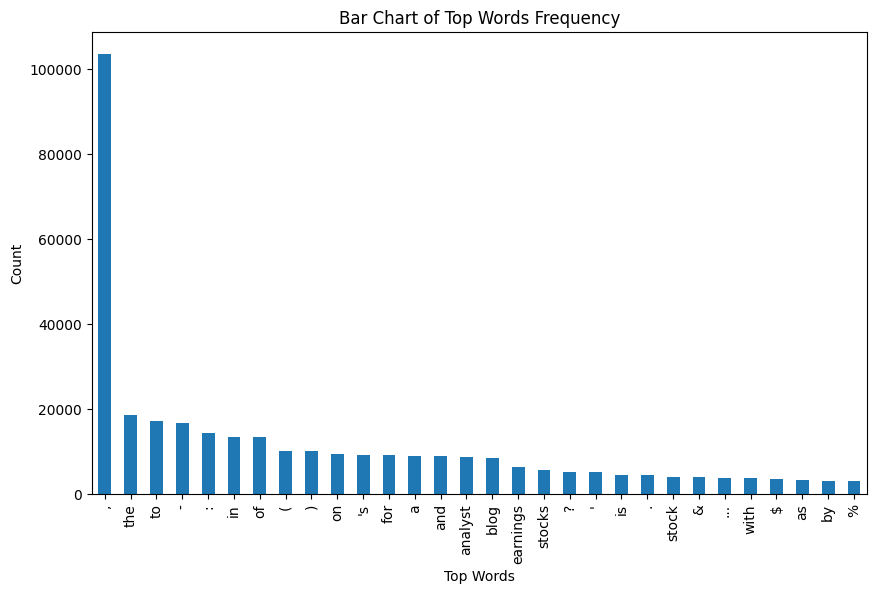

In [381]:
import matplotlib.pyplot as plt

# plot unigram in bargraph
ax = df_common_words.set_index('Word')['Frequency'].sort_values(ascending=False).plot(kind='bar', figsize=(10, 6))

plt.xlabel("Top Words")
plt.ylabel("Count")
plt.title("Bar Chart of Top Words Frequency")

plt.show()

##### **Bigram**

In [382]:
from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder
from nltk.tokenize import word_tokenize
import pandas as pd
import nltk

# Remove null values from News_Text column
news = melted_df['News_Text'].dropna()

# Tokenize the news and get lowercased words
tokens = [word.lower() for news_text in news for word in word_tokenize(news_text)]

# Obtain the 30 most frequent bigrams
bigram_measures = BigramAssocMeasures()
finder = BigramCollocationFinder.from_words(tokens)
bigram_freq = finder.ngram_fd.items()
common_bigrams = sorted(bigram_freq, key=lambda x: x[1], reverse=True)[:30]

# Create DataFrame for the 30 most frequent bigrams
df_common_bigrams = pd.DataFrame(common_bigrams, columns=['Bigram', 'Frequency'])
print(df_common_bigrams.head())


            Bigram  Frequency
0  (analyst, blog)       8305
1     (-, analyst)       8054
2        (blog, ,)       7795
3           (?, ,)       3371
4         (..., ,)       3351


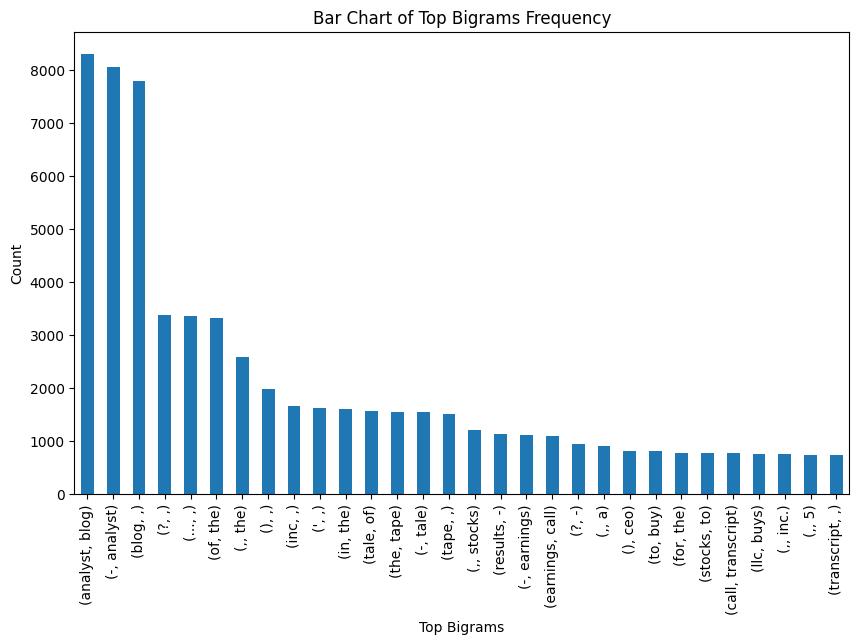

In [383]:
# plot the bigram
top_bigrams = df_common_bigrams.set_index('Bigram').head(30)

# Generatw a bar graph using pandas plotting
top_bigrams['Frequency'].sort_values(ascending=False).plot(kind='bar', figsize=(10, 6))

# Assign labels and title
plt.xlabel("Top Bigrams")
plt.ylabel("Count")
plt.title("Bar Chart of Top Bigrams Frequency")

plt.show()


##### **Trigram**

In [384]:
from nltk.collocations import TrigramAssocMeasures, TrigramCollocationFinder
from nltk.tokenize import word_tokenize
import pandas as pd

# Tokenize the news
news = melted_df['News_Text'].dropna()

tokens = [word.lower() for news in news for word in word_tokenize(news)]

# Obtain the 30 most frequent trigrams
trigram_measures = TrigramAssocMeasures()
finder = TrigramCollocationFinder.from_words(tokens)
trigram_freq = finder.ngram_fd.items()
common_trigrams = sorted(trigram_freq, key=lambda x: x[1], reverse=True)[:30]

df_common_trigrams = pd.DataFrame(common_trigrams, columns=['Trigram', 'Frequency'])
print(df_common_trigrams.head())

              Trigram  Frequency
0  (-, analyst, blog)       8053
1  (analyst, blog, ,)       7775
2     (tale, of, the)       1547
3     (of, the, tape)       1547
4       (-, tale, of)       1546


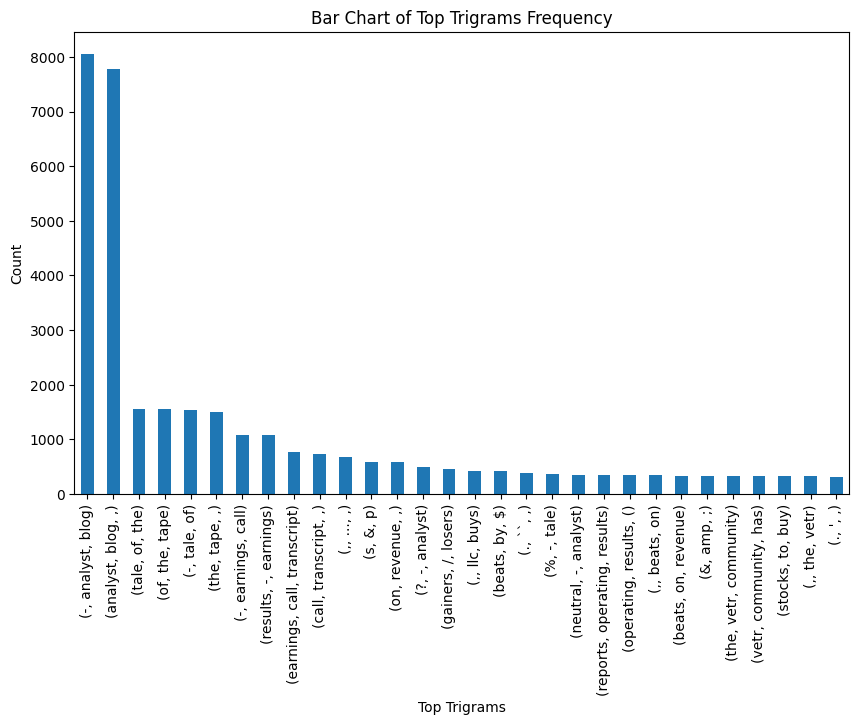

In [385]:
# Plot the trigrams
top_trigrams = df_common_trigrams.set_index('Trigram').head(30)

# Generate a bar graph using pandas plotting
top_trigrams['Frequency'].sort_values(ascending=False).plot(kind='bar', figsize=(10, 6))

plt.xlabel("Top Trigrams")
plt.ylabel("Count")
plt.title("Bar Chart of Top Trigrams Frequency")

plt.show()


#### **Identify the most frequently used parts of speech in news**

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


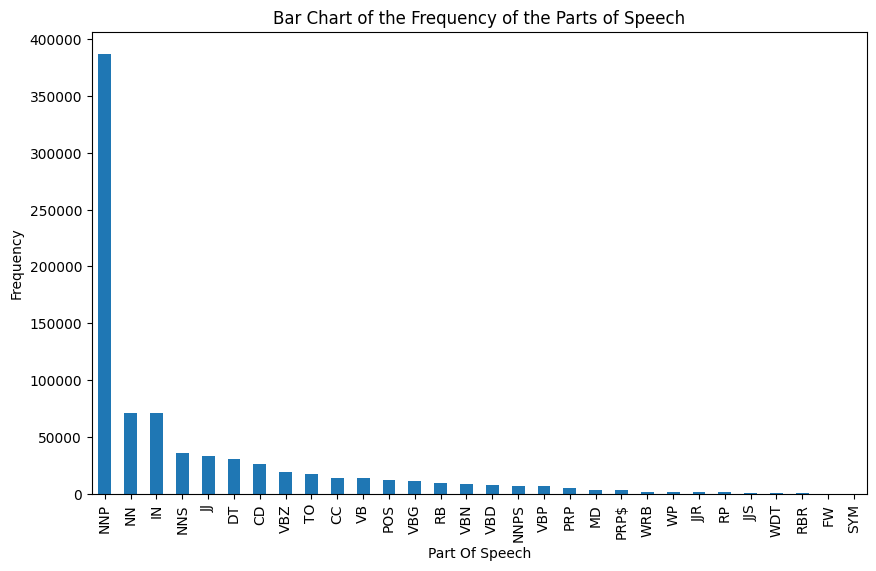

In [386]:
from textblob import TextBlob
import pandas as pd

# Download the necessary NLTK data
nltk.download('averaged_perceptron_tagger')

# Create a TextBlob object from the reviews
blob = TextBlob(" ".join(melted_df['News_Text'].dropna()))

# Get the parts of speech and their frequencies
pos_tags = blob.tags
pos_df = pd.DataFrame(pos_tags, columns=['word', 'pos'])
pos_freq = pos_df['pos'].value_counts().head(30)

# Create a bar chart using pandas plotting
pos_freq.plot(kind='bar',
              xlabel="Part Of Speech",
              ylabel="Frequency",
              title="Bar Chart of the Frequency of the Parts of Speech",
              figsize=(10, 6))

#  Show the plot
plt.show()

#### **Get Insights from Data**

In order to identify the distribution of news for each year, it was decided to add a separate column "Year" by extracting the year from the "Date" column.

<ipython-input-387-6d700ceba28d>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Year', data=melted_df, ax=ax, palette=colors)
<ipython-input-387-6d700ceba28d>:9: UserWarning: 
The palette list has fewer values (10) than needed (12) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x='Year', data=melted_df, ax=ax, palette=colors)


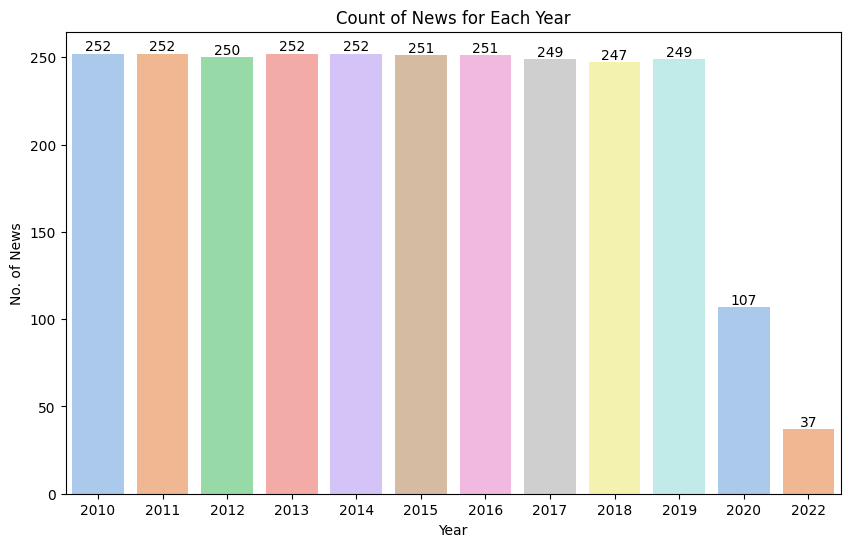

In [387]:
# Extract the year from the 'Date' column and create a new column for year
melted_df['Year'] = melted_df['Date'].dt.year

# Count of news for each year
fig, ax = plt.subplots(figsize=(10, 6))

colors = sns.color_palette("pastel")

sns.countplot(x='Year', data=melted_df, ax=ax, palette=colors)

for i in ax.containers:
    ax.bar_label(i, label_type='edge', fontsize=10)

plt.xlabel('Year')
plt.ylabel('No. of News')
plt.title('Count of News for Each Year')

plt.show()

### **Data Preprocessing**

In [388]:
# Convert the data "News_Text" column into string format
melted_df['News_Text'] = melted_df['News_Text'].astype(str)

In [389]:
# Remove the "Year" column from the dataset
melted_df = melted_df.drop(columns=['Year'])

# Check the updated shape of the dataset
print("Shape of the dataset after dropping 'Year' column:", melted_df.shape)

Shape of the dataset after dropping 'Year' column: (2649, 3)


In [390]:
# remove rows containing null values
melted_df = melted_df.dropna()

# The new shape of the dataset
print(f"New shape of dataset: {melted_df.shape}")

New shape of dataset: (2649, 3)


In [391]:
# check for null values in the dataset
melted_df.isnull().sum()

Date         0
Close        0
News_Text    0
dtype: int64

In [392]:
# Eliminate any duplicates
melted_df.drop_duplicates(inplace=True)
print(f"New shape of dataset: {melted_df.shape}")

New shape of dataset: (2649, 3)


#### **Removal of Contractions**

In [393]:
# Generate a dictionary with contractions and their expanded forms
contractions = {
"a'ight":"alright",
"ain't":"are not",
"amn't":"am not",
"aren't":"are not",
"can't":"cannot",
"'cause": "because",
"could've":"could have",
"couldn't":"could not",
"couldn't've":"could not have",
"daren't":"dare not",
"daresn't":"dare not",
"dasn't":"dare not",
"didn't":"did not",
"doesn't":"does not",
"don't":"do not",
"everybody's":"everybody is",
"everyone's":"everyone is",
"giv'n":"given",
"gonna":"going to",
"gon't":"go not",
"gotta":"got to",
"hadn't":"had not",
"had've":"had have",
"hasn't":"has not",
"haven't":"have not",
"he'd":"he had",
"he'll":"he will",
"he's":"he is",
"here's":"here is",
"how'd":"how did",
"how'll":"how will",
"how're":"how are",
"how's":"how is",
"I'd":"I had",
"I'd've":"I would have",
"I'd'nt":"I would not",
"I'd'nt've":"I would not have",
"I'll":"I will",
"I'm":"I am",
"I've":"I have",
"isn't":"is not",
"it'd":"it would",
"it'll":"it will",
"it's":"it is",
"let's":"let us",
"ma'am":"madam",
"mayn't":"may not",
"may've":"may have",
"mightn't":"might not",
"might've":"might have",
"mustn't":"must not",
"mustn't've":"must not have",
"must've":"must have",
"needn't":"need not",
"needn't've":"need not have",
"o'clock":"of the clock",
"oughtn't":"ought not",
"oughtn't've":"ought not have",
"shan't":"shall not",
"she'd":"she would",
"she'll":"she will",
"she's":"she is",
"should've":"should have",
"shouldn't":"should not",
"shouldn't've":"should not have",
"somebody's":"somebody is",
"someone's":"someone is",
"something's":"something is",
"so're":"so are",
"so’s":"so is",
"so’ve":"so have",
"that'll":"that will",
"that're":"that are",
"that's":"that is",
"that'd":"that would",
"there'd":"there would",
"there'll":"there will",
"there're":"there are",
"there's":"there is",
"these're":"these are",
"these've":"these have",
"they'd":"they would",
"they'll":"they will",
"they're":"they are",
"they've":"they have",
"this's":"this is",
"those're":"those are",
"those've":"those have",
"to've":"to have",
"wasn't":"was not",
"we'd":"we would",
"we'd've":"we would have",
"we'll":"we will",
"we're":"we are",
"we've":"we have",
"weren't":"were not",
"what'd":"what did",
"what'll":"what will",
"what're":"what are",
"what's":"what is",
"what've":"what have",
"when's":"when is",
"where'd":"where did",
"where'll":"where will",
"where're":"where are",
"where's":"where is",
"where've":"where have",
"which'd":"which would",
"which'll":"which will",
"which're":"which are",
"which's":"which is",
"which've":"which have",
"who'd":"who would",
"who'd've":"who would have",
"who'll":"who will",
"who're":"who are",
"who's":"who is",
"who've":"who have",
"why'd":"why did",
"why're":"why are",
"why's":"why is",
"won't":"will not",
"would've":"would have",
"wouldn't":"would not",
"wouldn't've":"would not have",
"y'at":"you at",
"yes’m":"yes madam",
"you'd":"you would",
"you'll":"you will",
"you're":"you are",
"you've":"you have"}

In [394]:
# Define a function to convert contractions to their expanded forms
def cont_to_exp(x):
    if type(x) is str:
        x = x.replace('\\','')
        for key in contractions:
            value = contractions[key]
            x = x.replace(key, value)
        return x
    else:
        return x

# Apply the function to the 'News_Text' column
melted_df['News_Text'] = melted_df['News_Text'].apply(lambda x: cont_to_exp(x))



### **Removal of "b" prefix from each news item**

This preprocessing step removes the b' prefix and any trailing single quotes from each news item in the "News_Text" column, which is important to ensure the text is clean and readable for subsequent analysis.

In [395]:
# Function to clean the 'b' prefix from each news item
def clean_news_text(text):
    if isinstance(text, str):
        text = text.replace("b'", "").replace('b"', "").replace("'", "").replace('"', "")
    return text

# Apply the function to the 'News_Text' column
melted_df['News_Text'] = melted_df['News_Text'].apply(clean_news_text)

# Show the adjusted DataFrame
print(melted_df.head(20))


         Date   Close                                          News_Text
0  2010-01-04  4.6225  New airport scanners break child porn laws, In...
1  2010-01-05  4.6900  These images depict the untouched stomach cont...
2  2010-01-06  4.7200  Three Americans go to Uganda and teach thousan...
3  2010-01-07  4.6275  23-year-old British woman on holiday in Dubai ...
4  2010-01-08  4.6375  Top Imams affiliated with the Islamic Supreme ...
5  2010-01-11  4.5725  Why would a former Guantanamo Bay prison guard...
6  2010-01-12  4.4175  Dear World, The Chinese government stole intel...
7  2010-01-13  4.4775  Please go to www.redcross.org and donate at le...
8  2010-01-14  4.4075  It never ceases to amaze me that in times of a...
9  2010-01-15  4.2775  France Calls for Cancellation of Haitis Debt, ...
10 2010-01-19  4.3575  Haiti Struck By Major Earthquake for 2nd Time ...
11 2010-01-20  4.3400  Hamas accepts Israels right to exist, Out of t...
12 2010-01-21  4.2625  Im proud: the Dutch collect 

#### **Removal of Special Characters**

In [396]:
import re

# Define a function to clear special characters
def clear_special_characters(text):
    pattern = r'[^a-zA-Z0-9\s]+'
    cleared_text = re.sub(pattern, '', text)
    return cleared_text

# Apply the function to the 'News_Text' column
melted_df['News_Text'] = melted_df['News_Text'].apply(clear_special_characters)


In [397]:
print(melted_df["News_Text"])

0       New airport scanners break child porn laws Ind...
1       These images depict the untouched stomach cont...
2       Three Americans go to Uganda and teach thousan...
3       23yearold British woman on holiday in Dubai to...
4       Top Imams affiliated with the Islamic Supreme ...
                              ...                        
3159    Booking Holdings BKNG to Expand Presence in th...
3160    Altria Shakes Off a Sell Rating and Gets an Up...
3161    Stock Market SellOff Where to Invest 5000 Righ...
3162    Walmart Has a New Way to Take Down Amazon Walm...
3164    Casino stocks rise as China eases COVID lockdo...
Name: News_Text, Length: 2649, dtype: object


#### **Removal of emojis**

In [398]:
# Define a function to remove emojis
def remove_emoji(text):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

# get news from the "News_Text" column
news = melted_df['News_Text'].dropna()

num_emoji_news = 0
for news in news:
    if contains_emoji(news):
        num_emoji_news += 1
        clean_news = remove_emoji(news)
        print("Original news:", news)
        print("Clean news:", clean_news)
        print()

print(f"There are {num_emoji_news} news that contain emojis.")

There are 0 news that contain emojis.


#### **Removal of URLs**

In [399]:
# Remove URLs
melted_df['News_Text'] = melted_df['News_Text'].replace(to_replace=r'http\S+', value='', regex=True)

print(melted_df['News_Text'])


0       New airport scanners break child porn laws Ind...
1       These images depict the untouched stomach cont...
2       Three Americans go to Uganda and teach thousan...
3       23yearold British woman on holiday in Dubai to...
4       Top Imams affiliated with the Islamic Supreme ...
                              ...                        
3159    Booking Holdings BKNG to Expand Presence in th...
3160    Altria Shakes Off a Sell Rating and Gets an Up...
3161    Stock Market SellOff Where to Invest 5000 Righ...
3162    Walmart Has a New Way to Take Down Amazon Walm...
3164    Casino stocks rise as China eases COVID lockdo...
Name: News_Text, Length: 2649, dtype: object


#### **Removal of HTML tags**

In [400]:
import re

def remove_html_tags(text):
    html_pattern = r'<.*?>'
    return re.sub(html_pattern, '', text)

# get news from the "News_Text" column
news = melted_df['News_Text'].dropna()

# Obtain the number of news with HTML tags
num_html_news = 0
for news in news:
    if re.search(html_pattern, news):
        num_html_news += 1
        clean_news = remove_html_tags(news)
        print("Original news:", news)
        print("Clean news:", clean_news)
        print()

print(f"There are {num_html_news} news that contain HTML tags.")


There are 0 news that contain HTML tags.


### **Tokenization**

In [401]:
import nltk
nltk.download('punkt')

# Tokenize the 'News_Text' column into individual words
melted_df['News_Text_tokens'] = melted_df['News_Text'].apply(nltk.word_tokenize)

print(melted_df['News_Text_tokens'])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


0       [New, airport, scanners, break, child, porn, l...
1       [These, images, depict, the, untouched, stomac...
2       [Three, Americans, go, to, Uganda, and, teach,...
3       [23yearold, British, woman, on, holiday, in, D...
4       [Top, Imams, affiliated, with, the, Islamic, S...
                              ...                        
3159    [Booking, Holdings, BKNG, to, Expand, Presence...
3160    [Altria, Shakes, Off, a, Sell, Rating, and, Ge...
3161    [Stock, Market, SellOff, Where, to, Invest, 50...
3162    [Walmart, Has, a, New, Way, to, Take, Down, Am...
3164    [Casino, stocks, rise, as, China, eases, COVID...
Name: News_Text_tokens, Length: 2649, dtype: object


#### **Lowercasing**

In [402]:
# Lowercase the tokenized words
melted_df['News_Text_tokens'] = melted_df['News_Text_tokens'].apply(lambda x: [token.lower() for token in x])

print(melted_df['News_Text_tokens'].head())

0    [new, airport, scanners, break, child, porn, l...
1    [these, images, depict, the, untouched, stomac...
2    [three, americans, go, to, uganda, and, teach,...
3    [23yearold, british, woman, on, holiday, in, d...
4    [top, imams, affiliated, with, the, islamic, s...
Name: News_Text_tokens, dtype: object


#### **Removal of Stopwords**

In [403]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

# Remove the stopwords
melted_df['News_Text_tokens'] = melted_df['News_Text_tokens'].apply(lambda x: [word for word in x if word.lower() not in stop])

print(melted_df['News_Text_tokens'].head())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0    [new, airport, scanners, break, child, porn, l...
1    [images, depict, untouched, stomach, contents,...
2    [three, americans, go, uganda, teach, thousand...
3    [23yearold, british, woman, holiday, dubai, to...
4    [top, imams, affiliated, islamic, supreme, cou...
Name: News_Text_tokens, dtype: object


#### **Removal of Rarewords**

In [404]:
# Calculate the frequency of each token
freq = pd.Series([token for news in melted_df['News_Text_tokens'] for token in news]).value_counts()

# get a list of tokens that appear just once
freq_rare = list(freq[freq == 1].index)

freq_rare

['ravage',
 'gioia',
 'schadenfreude',
 '494',
 'desertified',
 'deposition',
 'roxadustat',
 'whipsawed',
 'sophos',
 'firefighters',
 'eel',
 'phases',
 'bursting',
 'dannosa',
 'ckdassociated',
 'pstb',
 'olympian',
 'partes',
 'cleaner',
 'petering',
 'constituency',
 'falsebottomed',
 'fluorescent',
 'sterlings',
 'kane',
 'jetpacks',
 '926',
 'stockssp',
 'finjans',
 'prochazka',
 'nyseduk',
 'butcher',
 'valores',
 'discharged',
 'freeofcharge',
 'fltx',
 '268k',
 'uturns',
 'retests',
 'audis',
 'aab',
 'ultrarare',
 'suburbs',
 'zs9',
 'kesselrun',
 'lurking',
 'hotrolled',
 'startling',
 'infractions',
 'induced',
 'treasurylike',
 'fabian',
 'speartooth',
 'parasite',
 'cotenancy',
 'smiled',
 'attractiveeven',
 'antihate',
 'enteric',
 'longlost',
 'telocation',
 'warburg',
 'destabilized',
 'infiltrates',
 'sheepdogs',
 'montney',
 'heartmate',
 'shredded',
 'silliness',
 'thoratecs',
 'interns',
 'nyseacn',
 'cardholders',
 'cubabound',
 'disavow',
 'conservatism',
 'town

The following code for removing rare words could not be performed due to taking longer execution times and high processing power and is causing issues with the code. Therefore, it has been commented out for the time being

In [405]:
# # Remove rare words
# melted_df['News_Text-tokens'] = melted_df['News_Text_tokens'].apply(lambda x: [token for token in x if token not in freq_rare])

Join tokenized "News_Text_tokens" with News_Text_Final

In [406]:
melted_df['News_Text_Final']=melted_df['News_Text_tokens'].apply(' '.join)
melted_df['News_Text_Final']

0       new airport scanners break child porn laws ind...
1       images depict untouched stomach contents baby ...
2       three americans go uganda teach thousands incl...
3       23yearold british woman holiday dubai told pol...
4       top imams affiliated islamic supreme council c...
                              ...                        
3159    booking holdings bkng expand presence asia pac...
3160    altria shakes sell rating gets upgrade get 10 ...
3161    stock market selloff invest 5000 right stock m...
3162    walmart new way take amazon walmart new way ta...
3164    casino stocks rise china eases covid lockdowns...
Name: News_Text_Final, Length: 2649, dtype: object

#### **Stemming**

In [407]:
from nltk.stem.porter import PorterStemmer

stemmer = PorterStemmer()

# Create a function to stem words
def stem_words(text):
    return " ".join([stemmer.stem(word) for word in text.split()])

melted_df["News_Text_Final"] = melted_df["News_Text_Final"].apply(lambda text: stem_words(text))
melted_df.head()

,Date,Close,News_Text,News_Text_tokens,News_Text_Final
0,2010-01-04,4.6225,New airport scanners break child porn laws Ind...,"[new, airport, scanners, break, child, porn, l...",new airport scanner break child porn law india...
1,2010-01-05,4.6900,These images depict the untouched stomach cont...,"[images, depict, untouched, stomach, contents,...",imag depict untouch stomach content babi bird ...
2,2010-01-06,4.7200,Three Americans go to Uganda and teach thousan...,"[three, americans, go, uganda, teach, thousand...",three american go uganda teach thousand includ...
3,2010-01-07,4.6275,23yearold British woman on holiday in Dubai to...,"[23yearold, british, woman, holiday, dubai, to...",23yearold british woman holiday dubai told pol...
4,2010-01-08,4.6375,Top Imams affiliated with the Islamic Supreme ...,"[top, imams, affiliated, islamic, supreme, cou...",top imam affili islam suprem council canada is...


#### **Lemmatization**

In [408]:
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

# Generate a function to lemmatize words
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

melted_df["News_Text_Final"] = melted_df["News_Text_Final"].apply(lambda text: lemmatize_words(text))
melted_df.head()


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Date,Close,News_Text,News_Text_tokens,News_Text_Final
0,2010-01-04,4.6225,New airport scanners break child porn laws Ind...,"[new, airport, scanners, break, child, porn, l...",new airport scanner break child porn law india...
1,2010-01-05,4.6900,These images depict the untouched stomach cont...,"[images, depict, untouched, stomach, contents,...",imag depict untouch stomach content babi bird ...
2,2010-01-06,4.7200,Three Americans go to Uganda and teach thousan...,"[three, americans, go, uganda, teach, thousand...",three american go uganda teach thousand includ...
3,2010-01-07,4.6275,23yearold British woman on holiday in Dubai to...,"[23yearold, british, woman, holiday, dubai, to...",23yearold british woman holiday dubai told pol...
4,2010-01-08,4.6375,Top Imams affiliated with the Islamic Supreme ...,"[top, imams, affiliated, islamic, supreme, cou...",top imam affili islam suprem council canada is...


#### **Spelling Correction**

The following code for spelling correction could not be performed due to taking longer execution times and high processing power and is causing issues with the code. Therefore, it has been commented out for the time being

In [409]:
# from textblob import TextBlob

# # Define a function to correct spelling errors of a text column
# def correct_spelling(text):
#     blob = TextBlob(text)
#     return str(blob.correct())

# # Apply the function to the text column
# melted_df['News_Text_Final'] = melted_df['News_Text_Final'].apply(correct_spelling)
# melted_df.head()

### **Data Analysis**

Removing unnecessary columns; tokenized news text column "News_Text_tokens" which is irrelevant for the subsequent analysis

In [410]:
#Remove any unncessary columns
melted_df.drop('News_Text_tokens', axis=1, inplace=True)
melted_df.head()

,Date,Close,News_Text,News_Text_Final
0,2010-01-04,4.6225,New airport scanners break child porn laws Ind...,new airport scanner break child porn law india...
1,2010-01-05,4.6900,These images depict the untouched stomach cont...,imag depict untouch stomach content babi bird ...
2,2010-01-06,4.7200,Three Americans go to Uganda and teach thousan...,three american go uganda teach thousand includ...
3,2010-01-07,4.6275,23yearold British woman on holiday in Dubai to...,23yearold british woman holiday dubai told pol...
4,2010-01-08,4.6375,Top Imams affiliated with the Islamic Supreme ...,top imam affili islam suprem council canada is...


In [411]:
melted_df.tail()

,Date,Close,News_Text,News_Text_Final
3159,2022-06-23,158.800003,Booking Holdings BKNG to Expand Presence in th...,book hold bkng expand presenc asia pacif nike ...
3160,2022-06-24,158.800003,Altria Shakes Off a Sell Rating and Gets an Up...,altria shake sell rate get upgrad get 10 credi...
3161,2022-06-25,158.800003,Stock Market SellOff Where to Invest 5000 Righ...,stock market selloff invest 5000 right stock m...
3162,2022-06-26,163.745002,Walmart Has a New Way to Take Down Amazon Walm...,walmart new way take amazon walmart new way ta...
3164,2022-06-28,168.690002,Casino stocks rise as China eases COVID lockdo...,casino stock rise china ea covid lockdown bed ...


## **Sentiment Analysis**

### **1: Utilize Pre-trained Sentiment Analysis Models**

**1.1. Using VADER (pre-trained model)**

In [412]:
#Install the VADER Sentiment Package
!pip install vaderSentiment

In [413]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd

# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to calculate sentiment scores
def vader_sentiment(text):
    score = analyzer.polarity_scores(text)
    return score['compound']

# Apply sentiment analysis
melted_df['VADER_Sentiment'] = melted_df['News_Text_Final'].apply(vader_sentiment)
print(melted_df[['News_Text_Final', 'VADER_Sentiment']].head(10))

                                     News_Text_Final  VADER_Sentiment
0  new airport scanner break child porn law india...          -0.9871
1  imag depict untouch stomach content babi bird ...          -0.9964
2  three american go uganda teach thousand includ...          -0.9976
3  23yearold british woman holiday dubai told pol...          -0.9846
4  top imam affili islam suprem council canada is...          -0.9978
5  would former guantanamo bay prison guard track...          -0.9953
6  dear world chine govern stole intellectu prope...          -0.9840
7  plea go wwwredcrossorg donat least 10 help peo...          -0.9964
8  never ceas amaz time amaz human suffer somebod...          -0.9657
9  franc call cancel haiti debt photoshop disast ...          -0.9861


**1.2. Using TextBlob (pre-trained model)**

In [414]:
from textblob import TextBlob
import pandas as pd

# Function to calculate sentiment scores
def textblob_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

# Apply sentiment analysis
melted_df['TextBlob_Sentiment'] = melted_df['News_Text_Final'].apply(textblob_sentiment)
print(melted_df[['News_Text_Final', 'TextBlob_Sentiment']].head(10))

                                     News_Text_Final  TextBlob_Sentiment
0  new airport scanner break child porn law india...            0.006238
1  imag depict untouch stomach content babi bird ...            0.044781
2  three american go uganda teach thousand includ...            0.028833
3  23yearold british woman holiday dubai told pol...            0.115128
4  top imam affili islam suprem council canada is...           -0.032591
5  would former guantanamo bay prison guard track...           -0.011828
6  dear world chine govern stole intellectu prope...            0.031211
7  plea go wwwredcrossorg donat least 10 help peo...            0.062336
8  never ceas amaz time amaz human suffer somebod...           -0.046164
9  franc call cancel haiti debt photoshop disast ...            0.052782


In [415]:
melted_df.head(5)

,Date,Close,News_Text,News_Text_Final,VADER_Sentiment,TextBlob_Sentiment
0,2010-01-04,4.6225,New airport scanners break child porn laws Ind...,new airport scanner break child porn law india...,-0.9871,0.006238
1,2010-01-05,4.6900,These images depict the untouched stomach cont...,imag depict untouch stomach content babi bird ...,-0.9964,0.044781
2,2010-01-06,4.7200,Three Americans go to Uganda and teach thousan...,three american go uganda teach thousand includ...,-0.9976,0.028833
3,2010-01-07,4.6275,23yearold British woman on holiday in Dubai to...,23yearold british woman holiday dubai told pol...,-0.9846,0.115128
4,2010-01-08,4.6375,Top Imams affiliated with the Islamic Supreme ...,top imam affili islam suprem council canada is...,-0.9978,-0.032591


# Model experimenting and evaluvation for classification task

### Feature Enginering

In [416]:
import pandas as pd

# Assuming you already have your dataframe df
data = melted_df.copy()

# Drop the last row
data = data.iloc[:-1]

# Calculate tomorrow's price
data['Tomorrow_Price'] = data['Close'].shift(-1)

# Calculate trend
data['Trend'] = data.apply(lambda row: 'Buy' if row['Tomorrow_Price'] > row['Close'] else 'Sell', axis=1)

# Remove Tomorrow_Price
data.drop(columns=['Tomorrow_Price', 'TextBlob_Sentiment', 'News_Text_Final'], inplace=True)

# Remove News_Text column
data.drop(columns=['News_Text'], inplace=True)
data.head()

,Date,Close,VADER_Sentiment,Trend
0,2010-01-04,4.6225,-0.9871,Buy
1,2010-01-05,4.6900,-0.9964,Buy
2,2010-01-06,4.7200,-0.9976,Sell
3,2010-01-07,4.6275,-0.9846,Buy
4,2010-01-08,4.6375,-0.9978,Sell


### Train Test split

In [417]:
# Set 'Date' column as index
data.set_index('Date', inplace=True)
# Split the dataset into training and testing sets
# Last 252 days for testing, rest for training
X_train = data.iloc[:-252].drop(columns=['Trend'])
y_train = data.iloc[:-252]['Trend']
X_test = data.iloc[-252:].drop(columns=['Trend'])
y_test = data.iloc[-252:]['Trend']

print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (2396, 2) (2396,)
Testing set shape: (252, 2) (252,)


In [418]:
X_train

,Close,VADER_Sentiment
Date,,
2010-01-04,4.622500,-0.9871
2010-01-05,4.690000,-0.9964
2010-01-06,4.720000,-0.9976
2010-01-07,4.627500,-0.9846
2010-01-08,4.637500,-0.9978
...,...,...
2019-07-18,42.544998,0.3612
2019-07-19,42.110001,0.9477
2019-07-22,42.830002,0.7579


### Model Building

#### Use Machine learning to Stock predictions

In [419]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import numpy as np

# Logistic Regression
log_reg_model = LogisticRegression(max_iter=1000)
log_reg_model.fit(X_train, y_train)
log_reg_pred = log_reg_model.predict(X_test)

# Support Vector Machine (SVM)
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)

# Gradient Boosting
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)

# K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)



#### Using Deep learning to stock predictions

In [420]:

# LSTM Model
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import LabelEncoder

# Encode labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Reshape X_train and X_test for LSTM
X_train_lstm = np.reshape(X_train.values, (X_train.shape[0], 1, X_train.shape[1]))
X_test_lstm = np.reshape(X_test.values, (X_test.shape[0], 1, X_test.shape[1]))

# Build LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(units=500, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
lstm_model.add(Dense(units=100, activation='sigmoid'))
lstm_model.add(Dense(units=10, activation='sigmoid'))
lstm_model.add(Dense(units=1, activation='sigmoid'))
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
lstm_model.fit(X_train_lstm, y_train_encoded, epochs=100, batch_size=32, verbose=1)

# Predictions for LSTM
lstm_pred_probs = lstm_model.predict(X_test_lstm)
lstm_pred = (lstm_pred_probs > 0.5).astype(int)


Epoch 1/100
75/75 [==============================] - 4s 19ms/step - loss: 0.7065 - accuracy: 0.4921
Epoch 2/100
75/75 [==============================] - 1s 20ms/step - loss: 0.6940 - accuracy: 0.5184
Epoch 3/100
75/75 [==============================] - 1s 19ms/step - loss: 0.6937 - accuracy: 0.4933
Epoch 4/100
75/75 [==============================] - 1s 19ms/step - loss: 0.6928 - accuracy: 0.5200
Epoch 5/100
75/75 [==============================] - 2s 27ms/step - loss: 0.6935 - accuracy: 0.5184
Epoch 6/100
75/75 [==============================] - 2s 28ms/step - loss: 0.6942 - accuracy: 0.5013
Epoch 7/100
75/75 [==============================] - 2s 23ms/step - loss: 0.6927 - accuracy: 0.5159
Epoch 8/100
75/75 [==============================] - 1s 19ms/step - loss: 0.6926 - accuracy: 0.5146
Epoch 9/100
75/75 [==============================] - 1s 19ms/step - loss: 0.6926 - accuracy: 0.5192
Epoch 10/100
75/75 [==============================] - 1s 19ms/step - loss: 0.6925 - accuracy: 0.5175

## Model Evaluvation based on selected Matrix

In [421]:
# Updated Evaluation Function
def evaluate_model(classifier_name, y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    print(f"{classifier_name} Results:")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print("Classification Report:")
    print(classification_report(y_true, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_true, y_pred))

# Evaluation for Logistic Regression
evaluate_model("Logistic Regression", y_test, log_reg_pred)

# Evaluation for SVM
evaluate_model("Support Vector Machine", y_test, svm_pred)


# Evaluation for Gradient Boosting
evaluate_model("Gradient Boosting", y_test, gb_pred)

# Evaluation for K-Nearest Neighbors
evaluate_model("K-Nearest Neighbors", y_test, knn_pred)

# Evaluation for LSTM
evaluate_model("LSTM", y_test_encoded, lstm_pred)


Logistic Regression Results:
Accuracy: 0.4762
Precision: 0.2268
Recall: 0.4762
F1-Score: 0.3072
Classification Report:
              precision    recall  f1-score   support

         Buy       0.48      1.00      0.65       120
        Sell       0.00      0.00      0.00       132

    accuracy                           0.48       252
   macro avg       0.24      0.50      0.32       252
weighted avg       0.23      0.48      0.31       252

Confusion Matrix:
[[120   0]
 [132   0]]
Support Vector Machine Results:
Accuracy: 0.4881
Precision: 0.4992
Recall: 0.4881
F1-Score: 0.4631
Classification Report:
              precision    recall  f1-score   support

         Buy       0.48      0.72      0.57       120
        Sell       0.52      0.28      0.36       132

    accuracy                           0.49       252
   macro avg       0.50      0.50      0.47       252
weighted avg       0.50      0.49      0.46       252

Confusion Matrix:
[[86 34]
 [95 37]]
Gradient Boosting Results:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:13

# Model experimenting and evaluvation for Regression

### Feature Enginerring

In [422]:
import pandas as pd

# Assuming you already have your dataframe melted_df
data = melted_df.copy()

# Drop the last row
data = data.iloc[:-1]

# Calculate tomorrow's price
data['Tomorrow_Price'] = data['Close'].shift(-1)


# Remove News_Text column
data.drop(columns=['News_Text_Final','TextBlob_Sentiment', 'News_Text'], inplace=True)


In [423]:
data.head()

,Date,Close,VADER_Sentiment,Tomorrow_Price
0,2010-01-04,4.6225,-0.9871,4.6900
1,2010-01-05,4.6900,-0.9964,4.7200
2,2010-01-06,4.7200,-0.9976,4.6275
3,2010-01-07,4.6275,-0.9846,4.6375
4,2010-01-08,4.6375,-0.9978,4.5725


In [424]:
data.dropna(inplace=True)
data.tail()

,Date,Close,VADER_Sentiment,Tomorrow_Price
3157,2022-06-21,158.800003,-0.4215,158.800003
3158,2022-06-22,158.800003,-0.7717,158.800003
3159,2022-06-23,158.800003,0.5621,158.800003
3160,2022-06-24,158.800003,0.2732,158.800003
3161,2022-06-25,158.800003,0.8750,163.745002


### Train test split

In [425]:
# Set 'Date' column as index
data.set_index('Date', inplace=True)
# Split the dataset into training and testing sets
# Last 252 days for testing, rest for training
X_train = data.iloc[:-252].drop(columns=['Tomorrow_Price'])
y_train = data.iloc[:-252]['Tomorrow_Price']
X_test = data.iloc[-252:].drop(columns=['Tomorrow_Price'])
y_test = data.iloc[-252:]['Tomorrow_Price']

print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (2395, 2) (2395,)
Testing set shape: (252, 2) (252,)


### model Building

In [426]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
import numpy as np


# Function to calculate RMSE
def calculate_rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Linear Regression
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)
linear_reg_pred = linear_reg_model.predict(X_test)
linear_reg_rmse = calculate_rmse(y_test, linear_reg_pred)

# Ridge Regression
ridge_reg_model = Ridge()
ridge_reg_model.fit(X_train, y_train)
ridge_reg_pred = ridge_reg_model.predict(X_test)
ridge_reg_rmse = calculate_rmse(y_test, ridge_reg_pred)


# Gradient Boosting Regression
gb_reg_model = GradientBoostingRegressor()
gb_reg_model.fit(X_train, y_train)
gb_reg_pred = gb_reg_model.predict(X_test)
gb_reg_rmse = calculate_rmse(y_test, gb_reg_pred)

In [427]:
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
import numpy as np
import matplotlib.pyplot as plt

# LSTM Model with MinMax scaling and Early Stopping
scaler = MinMaxScaler(feature_range=(0, 1))
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_lstm = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_lstm = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

lstm_model = Sequential()
lstm_model.add(LSTM(units=500, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
lstm_model.add(Dense(units=10))
lstm_model.add(Dense(units=1))
lstm_model.compile(optimizer='adam', loss='mse')

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = lstm_model.fit(X_train_lstm, y_train, epochs=50, batch_size=32, verbose=1, validation_split=0.1, callbacks=[early_stopping])

# Predict using LSTM model
lstm_pred_scaled = lstm_model.predict(X_test_lstm)

Epoch 1/50
68/68 [==============================] - 4s 27ms/step - loss: 389.1458 - val_loss: 1340.2363
Epoch 2/50
68/68 [==============================] - 1s 19ms/step - loss: 198.5156 - val_loss: 626.1540
Epoch 3/50
68/68 [==============================] - 2s 22ms/step - loss: 118.0186 - val_loss: 267.1605
Epoch 4/50
68/68 [==============================] - 2s 27ms/step - loss: 32.3254 - val_loss: 16.8316
Epoch 5/50
68/68 [==============================] - 2s 27ms/step - loss: 1.9595 - val_loss: 6.1515
Epoch 6/50
68/68 [==============================] - 1s 19ms/step - loss: 0.9706 - val_loss: 5.7508
Epoch 7/50
68/68 [==============================] - 1s 19ms/step - loss: 0.9490 - val_loss: 5.6333
Epoch 8/50
68/68 [==============================] - 1s 19ms/step - loss: 0.9272 - val_loss: 5.5622
Epoch 9/50
68/68 [==============================] - 1s 19ms/step - loss: 0.8989 - val_loss: 5.4284
Epoch 10/50
68/68 [==============================] - 1s 19ms/step - loss: 0.8988 - val_loss: 5

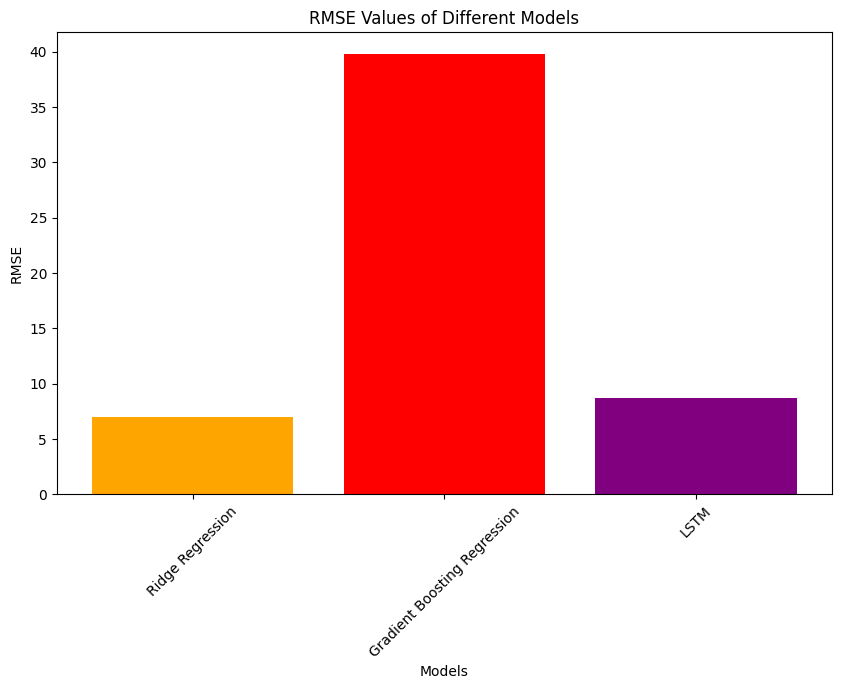

In [428]:
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Calculate RMSE values
linear_reg_rmse = np.sqrt(mean_squared_error(y_test, linear_reg_pred))
ridge_reg_rmse = np.sqrt(mean_squared_error(y_test, ridge_reg_pred))
gb_reg_rmse = np.sqrt(mean_squared_error(y_test, gb_reg_pred))
lstm_rmse = np.sqrt(mean_squared_error(y_test, lstm_pred_scaled))

# Model names
models = [ 'Ridge Regression', 'Gradient Boosting Regression', 'LSTM']
# RMSE values
rmse_values = [ ridge_reg_rmse, gb_reg_rmse, lstm_rmse]

# Plot RMSE values
plt.figure(figsize=(10, 6))
plt.bar(models, rmse_values, color=[ 'orange', 'red', 'purple'])
plt.title('RMSE Values of Different Models')
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.xticks(rotation=45)
plt.show()
